# Some interesting problems in basic python
these are taken from PHYS-E0412 - Computational Physics aalto university



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##1.Calculation of madelung constant with python
 $$M_{Na} = ∑^{∞}_{j,k,l=-\infty} \frac{(-1)^j+k+l}{\sqrt{j^2+k^2+l^2}}  $$

In [ ]:

L = int(input("Enter L: ")) # L grid size
M = 0.0
for j in range(-L, L + 1):
   for k in range(-L, L + 1):
      for l in range(-L, L + 1):
         if j == k == l == 0: #since at this point denominator becomes 0, we want to avoid this situation
            continue
         M += (-1)**(j+k+l) / np.sqrt( j**2 + k**2 + l**2 )
print("For L =", L, "M =", M)

## 2.The Catalan numbers
these are  $C_n$ are a sequence of integers 1, 1, 2, 5, 14, 42, 132
$\dots$ that play an important role in quantum mechanics and the theory of disordered systems.  (They were central to Eugene Wigner's proof
of the so-called semicircle law.)  They are given by

$$
C_0 = 1,\qquad C_{n+1} = {4n+2\over n+2}\,C_n.$$

In [ ]:
n=10
cat_nos = np.zeros(n+2)

    # YOUR CODE HERE
cat_nos[0] = 1
for i in range(0,n+1):
  cat_nos[i+1] = ((4*i+2)/(i+2))*cat_nos[i]

In [ ]:
print(cat_nos)

##3. another way to calculate catalan numbers
$$C_0 = 0 ; C_n = \sum^{n-1}_{0} C_{i-1} C_{n-i-1} $$

In [ ]:
def get_catalan_n(n):
    """ gets nth catalan number with recursion
    Args:
        n (int): the index of catalan number needed
    Returns:
        int: nth catalan number
    Raises:
        AssertionError: if n is not integer"""
    cn = 1
    assert isinstance(n, int), "n should be int"

    # YOUR CODE HERE
    if n<=1:
     return 1

    for i in range(n):
      cn += get_catalan_n(i) * get_catalan_n(n-i-1)
    return cn

    #raise NotImplementedError()



## 4 Another ball dropped from a tower

A ball is dropped from a tower of height $h$ with initial velocity zero.  Write a program that asks the user to enter the height of the tower in meters and then calculates and prints the time the ball takes until it hits the ground, ignoring air resistance.  Use your program to calculate the time for a ball dropped from a $100\,$m high tower.

In [ ]:
def time_from_h(s):
    """calculates time taken for a mass dropped from height
    s to hit the ground
    Args:
        s (float): height in meters
    Returns:
        float: time to reach the ground"""
    # constants
    a = 9.8  # acceleration due to gravity (m/s^2)
    t = 0  # time (s)

    # YOUR CODE HERE
    s = input('Enter Height: ')
    t = np.sqrt(2*s/a)
    raise NotImplementedError()

    return t

In [ ]:
# validation
assert time_from_h(0) == 0.0
assert abs(time_from_h(10) - 1.4285714) < 1e-4
print("Time for a ball dropped from 100m high tower: {} s"
      "".format(time_from_h(100)))

## 5 Transmission and Reflection
A well-known quantum mechanics problem involves a particle of mass $m$ that encounters a one-dimensional potential step, like this:

The particle with initial kinetic energy $E$ and wavevector $k_1=\sqrt{2mE}/\hbar$ enters from the left and encounters a
sudden jump in potential energy of height $V$ at position $x=0$.  By solving the Schroedinger equation, one can show that when $E>V$ the particle may either (a) pass the step, in which case it has a lower kinetic energy of $E-V$ on the other side and a correspondingly smaller wavevector of $k_2=\sqrt{2m(E-V)}/\hbar$, or (b) it may be reflected, keeping all of
its kinetic energy and an unchanged wavevector but moving in the opposite direction.  The probabilities $T$ and $R$ for transmission and reflection are given by

$$T = {4k_1k_2\over(k_1+k_2)^2}\,,\qquad
R = \biggl( {k_1-k_2\over k_1+k_2} \biggr)^2.$$

Suppose we have a particle with mass equal to the electron mass $m=9.11\times10^{-31}\,$kg and energy $10\,$eV encountering a potential step of height $9\,$eV.  Write a Python program to compute and print out the transmission and reflection probabilities using the formulas above.

In [ ]:
def get_tnr_prob(m, e, v):
    """get transmission and reflection probabilities
    Args:
        m (float): mass of the object in Kg
        e (float): energy of the object in eV
        v (float): height of the potential step in eV

    Retruns:
        float: transmission values
        float: reflection values
    """
    # constants
    hbar = 6.58211956e-16  # eVs
    t, r = 0, 0

    # YOUR CODE HERE
    raise NotImplementedError()

    return t, r

In [ ]:
# validation
t, r = get_tnr_prob(8e-30, 20, 15)
assert abs(t - 0.88888888) < 1e-4, "bad transmission probability"
assert abs(r - 0.11111111) < 1e-4, "bad reflection probability"

# ex
m = 9.11e-31  # Kg
e = 10  # eV
v = 9  # eV
t, r = get_tnr_prob(m, e, v)
print("With: M={} kg, E={} eV, and V={} eV\n"
      "Transmission probability: {}\n"
      "Reflection probability: {}".format(m, e, v, t, r))

## 6 Photoelectric Effect

Suppose we make some guess about the parameters $m$ and $c$ for the straight line.  We then calculate the vertical distances between the data points and that line, as represented by the short vertical lines in the figure, then we calculate the sum of the squares of those distances, which we denote $\chi^2$.  If we have $N$ data points with coordinates $(x_i,y_i)$, then $\chi^2$ is given by

$$
\chi^2 = \sum_{i=1}^N (mx_i+c-y_i)^2.
$$

The least-squares fit of the straight line to the data is the straight line that minimizes this total squared distance from data to line.  We find the minimum by differentiating with respect to both $m$ and $c$ and setting the derivatives to zero, which gives

\begin{align*}
m \sum_{i=1}^N x_i^2 + c \sum_{i=1}^N x_i - \sum_{i=1}^N x_iy_i &= 0, \\
m \sum_{i=1}^N x_i + cN - \sum_{i=1}^N y_i &= 0.
\end{align*}

For convenience, let us define the following quantities:
$$
E_x = {1\over N} \sum_{i=1}^N x_i,\qquad
E_y = {1\over N} \sum_{i=1}^N y_i,\qquad
E_{xx} = {1\over N} \sum_{i=1}^N x_i^2,\qquad
E_{xy} = {1\over N} \sum_{i=1}^N x_iy_i,
$$
in terms of which our equations can be written
\begin{align*}
mE_{xx} + cE_x &= E_{xy}\,, \\
mE_x + c &= E_y\,.
\end{align*}

Solving these equations simultaneously for $m$ and $c$ now gives

\begin{equation}
m = {E_{xy}-E_x E_y\over E_{xx} - E_x^2},\qquad
c = {E_{xx}E_y-E_x E_{xy}\over E_{xx} - E_x^2}.
\end{equation}

These are the equations for the least-squares fit of a straight line to $N$ data points.  They tell you the values of $m$ and $c$ for the line that best fits the given data.

(a) In the folder that you obtained this notebook you will find a file called ``millikan.txt``.  The file contains two columns of numbers, giving the $x$ and $y$ coordinates of a set of data points.  Write a function to read these data points and make a graph with one dot or circle for each point

In [ ]:
def read_millikan_data():
    """Reads data from 'millikan.txt'
    Returns
        list: list of x values
        list: list of y values"""
    filename = "millikan.txt"
    x = []
    y = []
    f = np.loadtxt("/content/sample_data/millikan.txt",delimiter = ' ')
    print(f)
    x = f[:,0]
    y = f[:,1]

    # YOUR CODE HERE
    #raise NotImplementedError()

    return x, y

[[5.48740e+14 5.30900e-01]
 [6.93100e+14 1.08420e+00]
 [7.43070e+14 1.27340e+00]
 [8.21930e+14 1.65980e+00]
 [9.60740e+14 2.19856e+00]
 [1.18400e+15 3.10891e+00]]


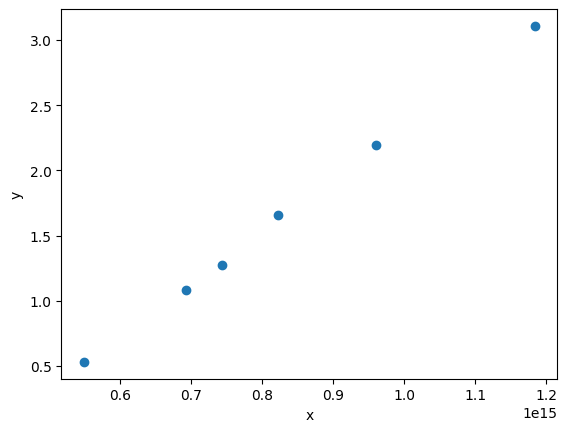

In [ ]:
x, y = read_millikan_data()

# validation
assert len(x) == 6, "lenght of x should be 6"
assert len(y) == 6, "lenght of y should be 6"
assert abs(x[0] - 5.4874e+14) < 1e8, "incorrect x values"
assert abs(y[0] - 0.5309) < 1e-5, "incorrect y values"

# plotting
plt.plot(x, y, 'o')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

(b) Write function `fit(x,y)` that fits a line to given $x$ and $y$ coordinates by first calculating the quantities $E_x$, $E_y$, $E_{xx}$, and $E_{xy}$ defined above, and then using these quantities to determine the slope $m$ and intercept $c$ of the best-fit line.

In [ ]:
# data fitting
def fit(x, y):
    """Fits straight line to the data
    Args:
        x (list): list of x values
        y (list): list of y values
    Returns
        float: m slope of the line fit
        float: c constant of the line fit"""
    m = 0
    c = 0

    # YOUR CODE HERE
    N = len(x)

    Ex = 0
    Ey = 0
    Exx = 0
    Exy = 0

    for i in range(N):
        Ex += x[i]
        Ey += y[i]
        Exx += x[i]*x[i]
        Exy += x[i]*y[i]

    Ex = Ex/N
    Ey = Ey/N
    Exx = Exx/N
    Exy = Exy/N
    m = (Exy - Ex*Ey)/(Exx - Ex*Ex)
    c = (Exx*Ey - Ex*Exy)/(Exx - Ex*Ex)
#raise NotImplementedError()

    return m, c

In [ ]:
# validation
m, c = fit([0, 1], [0, 1])
assert m == 1, "bad fit"
assert c == 0, "bad fit"

(c) Now use `fit()`-function to fit a line on the data that you read from ``millikan.txt`` and plot another graph that shows the fitted line with the data points. To plot the line, write code that goes through each of the data points in turn and evaluates the quantity $mx_i+c$ using the values of $m$ and $c$ that you obtained from `fit()`. Store these values in a new list, which you can then graph as a solid line. You should end up with a plot of the data points plus a straight line that runs through them.

[[5.48740e+14 5.30900e-01]
 [6.93100e+14 1.08420e+00]
 [7.43070e+14 1.27340e+00]
 [8.21930e+14 1.65980e+00]
 [9.60740e+14 2.19856e+00]
 [1.18400e+15 3.10891e+00]]


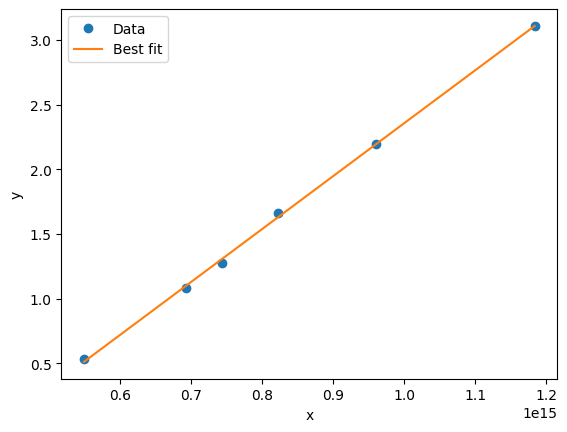

In [ ]:
x, y = read_millikan_data()

y_fit = [] # m*x_i + c

# YOUR CODE HERE
m,c = fit(x,y)
for i in range(len(x)):
    y_fit.append(m*x[i] + c)
#raise NotImplementedError()

plt.plot(x, y, 'o', label="Data")
plt.plot(x, y_fit, '-', label="Best fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()